# Air Quality in India EDA
###### Author: Lucas Correa
###### Date: January 13, 2023

##### This dataset extracted from Kaggle's website contains information about air quality in India.
##### The purporse of this analysis is to help decision takers to prevent increasing in diseases caused by air polution. 
##### All the gases and PMs, excepted by NOx, has unit equals to ug/m^3 - microgram per meter cubic. NOx unit is ppb - parts per billion. 
##### 1 ppb = 1 ug/L, 1 L = 0.001 m^3, then 1 ppb = 1000 ug/m^3

## 1. Perform Data Preparation and Data Cleaning
-  Load the file using pandas
-  Quick inspection on the dataset
-  Deal with missing values

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import opendatasets as od

In [2]:
url = "https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=stations.csv"

In [3]:
od.download(url)

Skipping, found downloaded files in "./air-quality-data-in-india" (use force=True to force download)


In [4]:
df = pd.read_csv("./air-quality-data-in-india/city_day.csv")

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
len(df.columns)

16

In [8]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [9]:
# Date should be as datetime

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
print(df.dtypes)

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object


In [12]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [13]:
# create a new column to translate AQI Bucket from a object to a numerical column to have a better 
# understanding under statistical approaches

In [14]:
df['AQI_Bucket_num'] = df.AQI_Bucket.replace({'Severe':0, 'Very Poor':1, 'Poor':2, 'Moderate':3, 'Good':4, 'Satisfactory':5})

In [15]:
df['AQI_Bucket_num'].unique()

array([nan,  2.,  1.,  0.,  3.,  5.,  4.])

In [16]:
len(df['City'].unique())

26

In [17]:
len(df)

29531

In [18]:
len(df.columns)

17

In [19]:
df.info

<bound method DataFrame.info of                 City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad 2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad 2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad 2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad 2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Tolue

In [20]:
# Is there any missing values?

In [21]:
df.isna().sum().sort_values(ascending = False)

Xylene            18109
PM10              11140
NH3               10328
Toluene            8041
Benzene            5623
AQI_Bucket_num     4681
AQI                4681
AQI_Bucket         4681
PM2.5              4598
NOx                4185
O3                 4022
SO2                3854
NO2                3585
NO                 3582
CO                 2059
Date                  0
City                  0
dtype: int64

<AxesSubplot:>

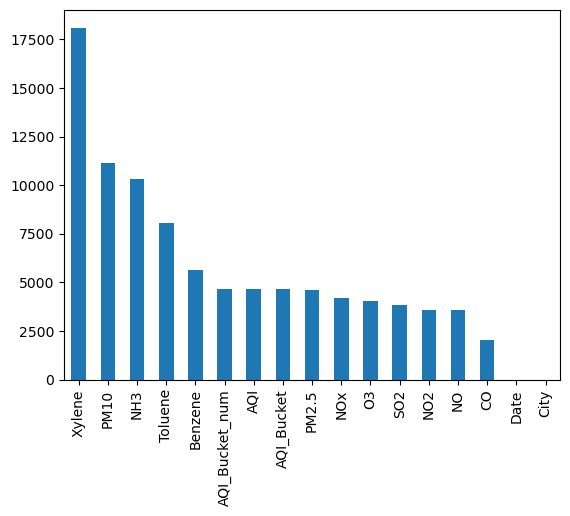

In [22]:
df.isna().sum().sort_values(ascending = False).plot.bar(x='index', y='n', rot=90)

In [23]:
# Percentage of missing values per column

In [24]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending = False)

Xylene            61.322001
PM10              37.723071
NH3               34.973418
Toluene           27.229014
Benzene           19.041008
AQI_Bucket_num    15.851139
AQI               15.851139
AQI_Bucket        15.851139
PM2.5             15.570079
NOx               14.171549
O3                13.619586
SO2               13.050692
NO2               12.139785
NO                12.129626
CO                 6.972334
Date               0.000000
City               0.000000
dtype: float64

<AxesSubplot:>

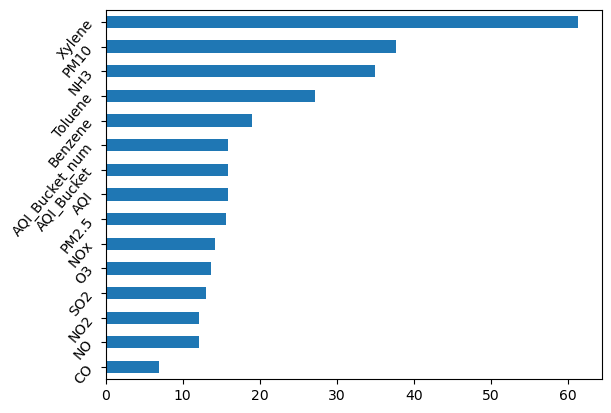

In [25]:
percent_missing[percent_missing != 0].sort_values(ascending = True).plot.barh(rot = 50)

In [26]:
# Remove columns that have more than half of data missing

In [27]:
df.drop(columns = ['Xylene'], inplace = True)

In [28]:
len(df.columns)

16

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket_num
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,24850.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,166.463581,3.254326
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,140.696585,1.511897
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000,0.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,81.000000,2.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,118.000000,3.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,208.000000,5.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000,5.000000


##### Replacing all the NaN values from the gases columns by the mean value of the correspondent gases with respect to the City they were recorded.

In [30]:
# Ahmedabad

In [31]:
Ahmedabad_means = df.loc[df['City'] == 'Ahmedabad', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Ahmedabad City
Ahmedabad_means

Ahmedabad_means['AQI_Bucket_num'] = Ahmedabad_means['AQI_Bucket_num'].astype('int')
Ahmedabad_means['AQI_Bucket_num']

df.loc[df['City'] == 'Ahmedabad'] = df.loc[df['City'] == 'Ahmedabad'].fillna(Ahmedabad_means)

df.loc[df['City'] == 'Ahmedabad', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].isna().sum()

PM2.5                0
PM10                 0
NO                   0
NO2                  0
NOx                  0
NH3               2009
CO                   0
SO2                  0
O3                   0
Benzene              0
Toluene              0
AQI                  0
AQI_Bucket_num       0
dtype: int64

In [32]:
# Aizawl

In [33]:
Aizawl_means = df.loc[df['City'] == 'Aizawl', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Aizawl City

Aizawl_means['AQI_Bucket_num'] = Aizawl_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Aizawl'] = df.loc[df['City'] == 'Aizawl'].fillna(Aizawl_means)

df.loc[df['City'] == 'Aizawl', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].isna().sum()

PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
AQI               0
AQI_Bucket_num    0
dtype: int64

In [34]:
# Amaravati

In [35]:
Amaravati_means = df.loc[df['City'] == 'Amaravati', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Amaravati City
Amaravati_means['AQI_Bucket_num'] = Amaravati_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Amaravati'] = df.loc[df['City'] == 'Amaravati'].fillna(Amaravati_means)

In [36]:
# Amritsar

In [37]:
Amritsar_means = df.loc[df['City'] == 'Amritsar', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Amritsar city
Amritsar_means['AQI_Bucket_num'] = Amritsar_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Amritsar'] = df.loc[df['City'] == 'Amritsar'].fillna(Amritsar_means)

In [38]:
# Bengaluru

In [39]:
Bengaluru_means = df.loc[df['City'] == 'Bengaluru', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Bengaluru city
Bengaluru_means['AQI_Bucket_num'] = Bengaluru_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Bengaluru'] = df.loc[df['City'] == 'Bengaluru'].fillna(Bengaluru_means)

In [40]:
# Bhopal

In [41]:
Bhopal_means = df.loc[df['City'] == 'Bhopal', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Bhopal city
Bhopal_means['AQI_Bucket_num'] = Bhopal_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Bhopal'] = df.loc[df['City'] == 'Bhopal'].fillna(Bhopal_means)

In [42]:
# Brajrajnagar

In [43]:
Brajrajnagar_means = df.loc[df['City'] == 'Brajrajnagar', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
     'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Brajrajnagar city
Brajrajnagar_means['AQI_Bucket_num'] = Brajrajnagar_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Brajrajnagar'] = df.loc[df['City'] == 'Brajrajnagar'].fillna(Brajrajnagar_means)

In [44]:
# Chandigarh

In [45]:
Chandigarh_means = df.loc[df['City'] == 'Chandigarh', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Chandigarh city
Chandigarh_means['AQI_Bucket_num'] = Chandigarh_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Chandigarh'] = df.loc[df['City'] == 'Chandigarh'].fillna(Chandigarh_means)

In [46]:
# Chennai

In [47]:
Chennai_means = df.loc[df['City'] == 'Chennai', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Chennai city
Chennai_means['AQI_Bucket_num'] = Chennai_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Chennai'] = df.loc[df['City'] == 'Chennai'].fillna(Chennai_means)

In [48]:
# Coimbatore

In [49]:
Coimbatore_means = df.loc[df['City'] == 'Coimbatore', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Coimbatore city
Coimbatore_means['AQI_Bucket_num'] = Coimbatore_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Coimbatore'] = df.loc[df['City'] == 'Coimbatore'].fillna(Coimbatore_means)

In [50]:
# Delhi

In [51]:
Delhi_means = df.loc[df['City'] == 'Delhi', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Delhi city
Delhi_means['AQI_Bucket_num'] = Delhi_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Delhi'] = df.loc[df['City'] == 'Delhi'].fillna(Delhi_means)

In [52]:
# Ernakulam

In [53]:
Ernakulam_means = df.loc[df['City'] == 'Ernakulam', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Ernakulam city
Ernakulam_means['AQI_Bucket_num'] = Ernakulam_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Ernakulam'] = df.loc[df['City'] == 'Ernakulam'].fillna(Ernakulam_means)

In [54]:
# Gurugram

In [55]:
Gurugram_means = df.loc[df['City'] == 'Gurugram', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Gurugram city
Gurugram_means['AQI_Bucket_num'] = Gurugram_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Gurugram'] = df.loc[df['City'] == 'Gurugram'].fillna(Gurugram_means)

In [56]:
# Guwahati

In [57]:
Guwahati_means = df.loc[df['City'] == 'Guwahati', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Guwahati city
Guwahati_means['AQI_Bucket_num'] = Guwahati_means['AQI_Bucket_num'].astype('int') 

df.loc[df['City'] == 'Guwahati'] = df.loc[df['City'] == 'Guwahati'].fillna(Guwahati_means)

In [58]:
# Hyderabad

In [59]:
Hyderabad_means = df.loc[df['City'] == 'Hyderabad', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Hyderabad city
Hyderabad_means['AQI_Bucket_num'] = Hyderabad_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Hyderabad'] = df.loc[df['City'] == 'Hyderabad'].fillna(Hyderabad_means)

In [60]:
# Jaipur

In [61]:
Jaipur_means = df.loc[df['City'] == 'Jaipur', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Jaipur city
Jaipur_means['AQI_Bucket_num'] = Jaipur_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Jaipur'] = df.loc[df['City'] == 'Jaipur'].fillna(Jaipur_means)

In [62]:
# Jorapokhar

In [63]:
Jorapokhar_means = df.loc[df['City'] == 'Jorapokhar', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Jorapokhar city
Jorapokhar_means['AQI_Bucket_num'] = Jorapokhar_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Jorapokhar'] = df.loc[df['City'] == 'Jorapokhar'].fillna(Jorapokhar_means)

In [64]:
# Kochi

In [65]:
Kochi_means = df.loc[df['City'] == 'Kochi', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Kochi city
Kochi_means['AQI_Bucket_num'] = Kochi_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Kochi'] = df.loc[df['City'] == 'Kochi'].fillna(Kochi_means)

In [66]:
# Kolkata

In [67]:
Kolkata_means = df.loc[df['City'] == 'Kolkata', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Kolkata city
Kolkata_means['AQI_Bucket_num'] = Kolkata_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Kolkata'] = df.loc[df['City'] == 'Kolkata'].fillna(Kolkata_means)

In [68]:
# Lucknow

In [69]:
Lucknow_means = df.loc[df['City'] == 'Lucknow', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Lucknow city
Lucknow_means['AQI_Bucket_num'] = Lucknow_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Lucknow'] = df.loc[df['City'] == 'Lucknow'].fillna(Lucknow_means)

In [70]:
# Mumbai

In [71]:
Mumbai_means = df.loc[df['City'] == 'Mumbai', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Mumbai city
Mumbai_means['AQI_Bucket_num'] = Mumbai_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Mumbai'] = df.loc[df['City'] == 'Mumbai'].fillna(Mumbai_means)

In [72]:
# Patna

In [73]:
Patna_means = df.loc[df['City'] == 'Patna', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Patna city
Patna_means['AQI_Bucket_num'] = Patna_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Patna'] = df.loc[df['City'] == 'Patna'].fillna(Patna_means)

In [74]:
# Shillong

In [75]:
Shillong_means = df.loc[df['City'] == 'Shillong', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Shillong city
Shillong_means['AQI_Bucket_num'] = Shillong_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Shillong'] = df.loc[df['City'] == 'Shillong'].fillna(Shillong_means)

In [76]:
# Talcher

In [77]:
Talcher_means = df.loc[df['City'] == 'Talcher', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Talcher city
Talcher_means['AQI_Bucket_num'] = Talcher_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Talcher'] = df.loc[df['City'] == 'Talcher'].fillna(Talcher_means)

In [78]:
# Thiruvananthapuram

In [79]:
Thiruvananthapuram_means = df.loc[df['City'] == 'Thiruvananthapuram', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Thiruvananthapuram city
Thiruvananthapuram_means['AQI_Bucket_num'] = Thiruvananthapuram_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Thiruvananthapuram'] = df.loc[df['City'] == 'Thiruvananthapuram'].fillna(Thiruvananthapuram_means)

In [80]:
# Visakhapatnam

In [81]:
Visakhapatnam_means = df.loc[df['City'] == 'Visakhapatnam', ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket_num']].mean() # Columns mean for Visakhapatnam city
Visakhapatnam_means['AQI_Bucket_num'] = Visakhapatnam_means['AQI_Bucket_num'].astype('int')

df.loc[df['City'] == 'Visakhapatnam'] = df.loc[df['City'] == 'Visakhapatnam'].fillna(Visakhapatnam_means)

In [82]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,AQI_Bucket_num
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,452.122939,NaN,1.0
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,452.122939,NaN,1.0
2,Ahmedabad,2015-01-03,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,452.122939,NaN,1.0
3,Ahmedabad,2015-01-04,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,452.122939,NaN,1.0
4,Ahmedabad,2015-01-05,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,452.122939,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,41.000000,Good,4.0
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,70.000000,Satisfactory,5.0
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,68.000000,Satisfactory,5.0
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.000000,0.000000,54.000000,Satisfactory,5.0


## 2. Exploratory Analysis and Visualization

Firstly, I would like to check the relationship between each one of the gases and partiucles and the AQI score for every city in order to be very speficific. However, I will only consider the top 3 most polluted cities and drawn insights form it.  

In [83]:
national_AQI_mean = df['AQI'].mean()
national_AQI_mean

169.48655607453176

In [84]:
df_grouped = df.groupby('City').mean()
df_grouped['AQI']

City
Ahmedabad             452.122939
Aizawl                 34.765766
Amaravati              95.299643
Amritsar              119.920959
Bengaluru              94.318325
Bhopal                132.827338
Brajrajnagar          150.280505
Chandigarh             96.498328
Chennai               114.502654
Coimbatore             73.023256
Delhi                 259.487744
Ernakulam              92.359477
Gurugram              225.123882
Guwahati              140.111111
Hyderabad             109.207447
Jaipur                133.679159
Jorapokhar            159.251621
Kochi                 104.284810
Kolkata               140.566313
Lucknow               217.973059
Mumbai                105.352258
Patna                 240.782042
Shillong               53.795122
Talcher               172.886819
Thiruvananthapuram     75.878327
Visakhapatnam         117.269855
Name: AQI, dtype: float64

In [85]:
df_grouped['AQI'][df_grouped['AQI'] > national_AQI_mean].sort_values(ascending = False) # cities above the national AQI Average

City
Ahmedabad    452.122939
Delhi        259.487744
Patna        240.782042
Gurugram     225.123882
Lucknow      217.973059
Talcher      172.886819
Name: AQI, dtype: float64

In [86]:
df_grouped['AQI'][df_grouped['AQI'] <= national_AQI_mean].sort_values(ascending = True) # These are the cities under the national AQI Average

City
Aizawl                 34.765766
Shillong               53.795122
Coimbatore             73.023256
Thiruvananthapuram     75.878327
Ernakulam              92.359477
Bengaluru              94.318325
Amaravati              95.299643
Chandigarh             96.498328
Kochi                 104.284810
Mumbai                105.352258
Hyderabad             109.207447
Chennai               114.502654
Visakhapatnam         117.269855
Amritsar              119.920959
Bhopal                132.827338
Jaipur                133.679159
Guwahati              140.111111
Kolkata               140.566313
Brajrajnagar          150.280505
Jorapokhar            159.251621
Name: AQI, dtype: float64

In [87]:
import scipy
from scipy import stats

In [88]:
# NO2

In [89]:
Ahmedabad_NO2_stats = scipy.stats.linregress(df['NO2'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_NO2_slope = Ahmedabad_NO2_stats[0]
Ahmedabad_NO2_stats

LinregressResult(slope=3.341642013808358, intercept=254.88086096319833, rvalue=0.5194455343244649, pvalue=3.049585684427606e-139, stderr=0.12270438881906172, intercept_stderr=8.712880212003709)

<AxesSubplot:xlabel='NO2', ylabel='AQI'>

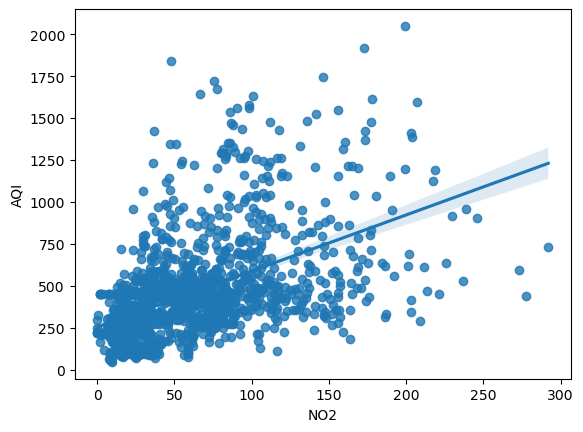

In [150]:
sns.regplot(df['NO2'][df['City'] == 'Ahmedabad']  , y = df['AQI'][df['City'] == 'Ahmedabad'])

Positive correlation, slope=3.341642013808358

I wont be ploting graph because we only need the slop to analyze correlation statistically

In [91]:
# NO

In [92]:
Ahmedabad_NO_stats = scipy.stats.linregress(df['NO'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_NO_slope = Ahmedabad_NO_stats[0]
Ahmedabad_NO_stats

LinregressResult(slope=11.332889887379896, intercept=197.9486412889377, rvalue=0.7983595764678474, pvalue=0.0, stderr=0.1908075302477345, intercept_stderr=5.473866865372212)

I am kind of interested to check this graph.

<AxesSubplot:xlabel='NO', ylabel='AQI'>

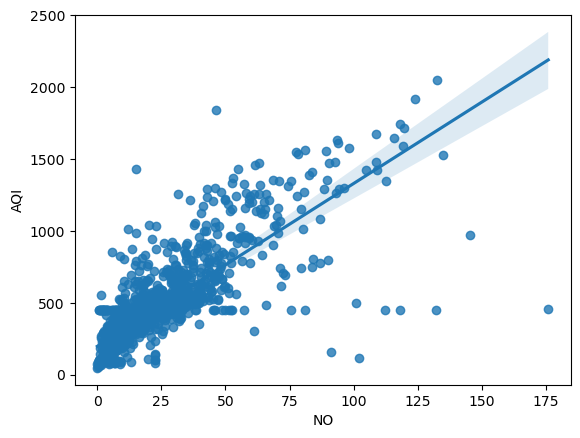

In [93]:
sns.regplot(df['NO'][df['City'] == 'Ahmedabad']  , y = df['AQI'][df['City'] == 'Ahmedabad'])

NO definetely more relevant than NO2 for AQI score

In [94]:
# NOx

In [95]:
Ahmedabad_NOx_stats = scipy.stats.linregress(df['NOx'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_NOx_slope = Ahmedabad_NOx_stats[0]
Ahmedabad_NOx_stats

LinregressResult(slope=5.972618359987727, intercept=169.21853670829285, rvalue=0.6630985841715855, pvalue=9.31240791617449e-255, stderr=0.15049545803030095, intercept_stderr=8.295531881074437)

In [96]:
# NH3

In [97]:
Ahmedabad_NH3_stats = scipy.stats.linregress(df['NH3'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_NH3_slope =Ahmedabad_NH3_stats[0]
Ahmedabad_NH3_stats

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

NaN for this city. I wll check correlation in another city, just to have an idea

In [98]:
Delhi_NH3_stats = scipy.stats.linregress(df['NH3'][df['City'] == 'Delhi'], df['AQI'][df['City'] == 'Delhi'])
Delhi_NH3_slope =Delhi_NH3_stats[0]
Delhi_NH3_stats

LinregressResult(slope=3.5669899589914658, intercept=109.68433151567754, rvalue=0.5163970243446392, pvalue=2.3306693993205677e-137, stderr=0.13203692864534775, intercept_stderr=5.995120561633724)

Delhi is the second most polluted city on your dataframe. Theres a positive correlation with slope = 3.5669899589914658

In [99]:
# CO

In [100]:
Ahmedabad_CO_stats = scipy.stats.linregress(df['CO'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_CO_slope = Ahmedabad_CO_stats[0]
Ahmedabad_CO_stats

LinregressResult(slope=11.28790508874895, intercept=201.6058651062001, rvalue=0.8028272863371227, pvalue=0.0, stderr=0.18711905099589404, intercept_stderr=5.3540318766209065)

In [101]:
# SO2

In [102]:
Ahmedabad_SO2_stats = scipy.stats.linregress(df['SO2'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_SO2_slope = Ahmedabad_SO2_stats[0]
Ahmedabad_SO2_stats

LinregressResult(slope=2.838373326281054, intercept=295.2922175950524, rvalue=0.3669656906065129, pvalue=4.462915891586257e-65, stderr=0.16060638255154225, intercept_stderr=10.322287323223934)

In [103]:
# O3

In [104]:
Ahmedabad_O3_stats = scipy.stats.linregress(df['O3'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_O3_slope = Ahmedabad_O3_stats[0]
Ahmedabad_O3_stats

LinregressResult(slope=1.9236070662631506, intercept=376.80331929847, rvalue=0.13883506507541515, pvalue=4.1240072474748147e-10, stderr=0.3062789105558845, intercept_stderr=13.241087316995273)

In [105]:
# Benzene

In [106]:
Ahmedabad_Benzene_stats = scipy.stats.linregress(df['Benzene'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_Benzene_slope = Ahmedabad_Benzene_stats[0]
Ahmedabad_Benzene_stats

LinregressResult(slope=9.601759025403412, intercept=400.14086504737975, rvalue=0.26059679974536987, pvalue=1.5217828401463455e-32, stderr=0.794029798657528, intercept_stderr=6.958698126988591)

In [107]:
# Toluene

In [108]:
Ahmedabad_Toluene_stats = scipy.stats.linregress(df['Toluene'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_Toluene_slope = Ahmedabad_Toluene_stats[0]
Ahmedabad_Toluene_stats

LinregressResult(slope=2.425543986284663, intercept=384.8370767685053, rvalue=0.24372381606502005, pvalue=1.4847260342584165e-28, stderr=0.21544662072460996, intercept_stderr=8.120196833941746)

In [109]:
# PM2.5

In [110]:
Ahmedabad_PM25_stats = scipy.stats.linregress(df['PM2.5'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_PM25_slope =Ahmedabad_PM25_stats[0]
Ahmedabad_PM25_stats

LinregressResult(slope=3.7541685624414862, intercept=197.38572004353824, rvalue=0.4839085936630179, pvalue=1.9651263096523364e-118, stderr=0.15154570635725198, intercept_stderr=11.416852875356572)

In [111]:
# PM10

In [112]:
Ahmedabad_PM10_stats = scipy.stats.linregress(df['PM10'][df['City'] == 'Ahmedabad'], df['AQI'][df['City'] == 'Ahmedabad'])
Ahmedabad_PM10_slope = Ahmedabad_PM10_stats[0]
Ahmedabad_PM10_stats

LinregressResult(slope=2.559600328654289, intercept=158.83361900487995, rvalue=0.20719208445611478, pvalue=6.4151723828615364e-21, stderr=0.26977238391415415, intercept_stderr=31.405006973234414)

In [113]:
### From this superficial statistical analysis I will move forward considering only the "main" contributors to pollution gases. 

Let's analyze NO a little bit deeper

In [114]:
df['NO'][df['City'] == 'Ahmedabad']

0        0.92
1        0.97
2       17.40
3        1.70
4       22.10
        ...  
2004     9.18
2005     6.37
2006     9.06
2007     7.09
2008     4.42
Name: NO, Length: 2009, dtype: float64

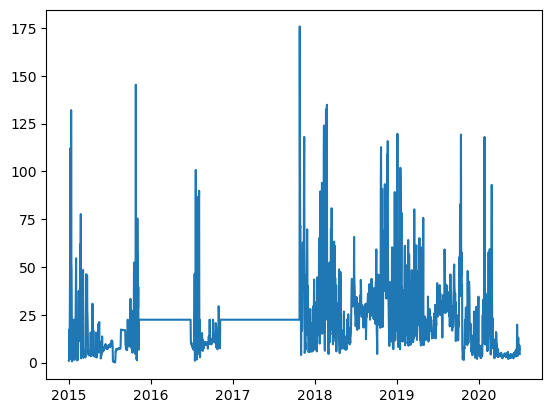

In [115]:
plt.plot(df['Date'][df['City'] == 'Ahmedabad'], df['NO'][df['City'] == 'Ahmedabad'])

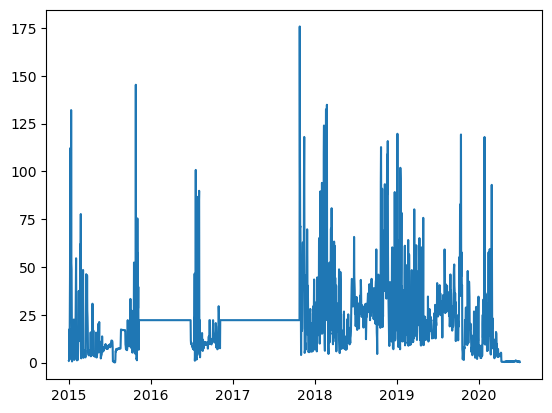

In [116]:
plt.plot(df['Date'][df['City'] == 'Ahmedabad'], df['CO'][df['City'] == 'Ahmedabad'])

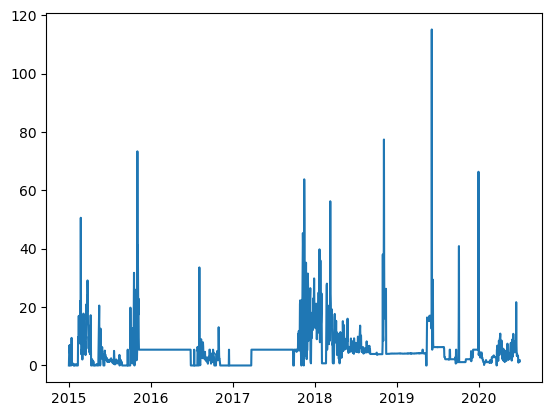

In [117]:
plt.plot(df['Date'][df['City'] == 'Ahmedabad'], df['Benzene'][df['City'] == 'Ahmedabad'])

The straight lines with values different from 0 in the graphs above are the NaN that were replaced by the mean value.

NO and CO are very similar throughout the year. I wonder if they keep similar for other cities.

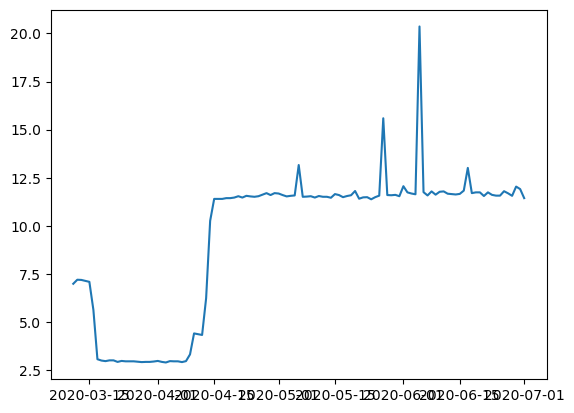

In [118]:
plt.plot(df['Date'][df['City'] == 'Aizawl'], df['NO'][df['City'] == 'Aizawl'])

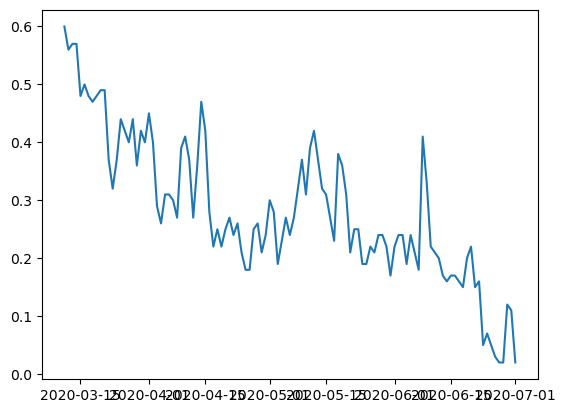

In [119]:
plt.plot(df['Date'][df['City'] == 'Aizawl'], df['CO'][df['City'] == 'Aizawl'])

In [120]:
len(df['Date'][df['City'] == 'Aizawl'])

113

The two cities (Aizawl and Ahmedabad) have amount of day records very different. Not enough to create a relationship.

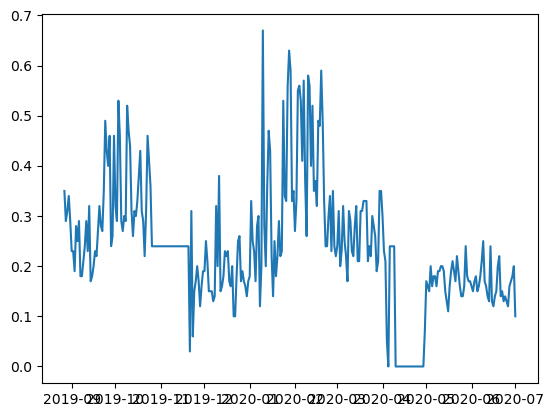

In [121]:
plt.plot(df['Date'][df['City'] == 'Shillong'], df['CO'][df['City'] == 'Shillong'])

In [122]:
len(df['Date'][df['City'] == 'Shillong'])

310

In [123]:
len(df['Date'][df['City'] == 'Coimbatore'])

386

 The data for being considered a polluted city or not is direct related to the amount of available data.

In [124]:
len(df['Date'][df['City'] == 'Patna'])

1858

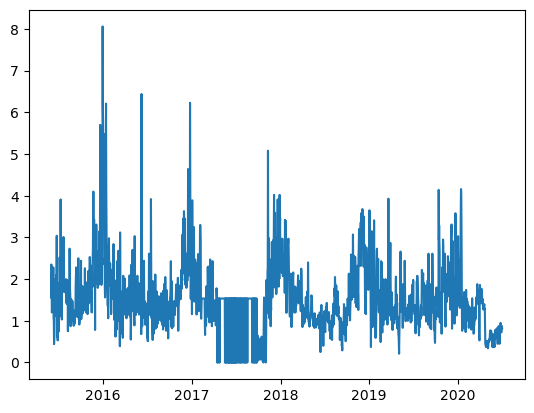

In [125]:
plt.plot(df['Date'][df['City'] == 'Patna'], df['CO'][df['City'] == 'Patna'])

In [126]:
len(df['Date'][df['City'] == 'Mumbai'])

2009

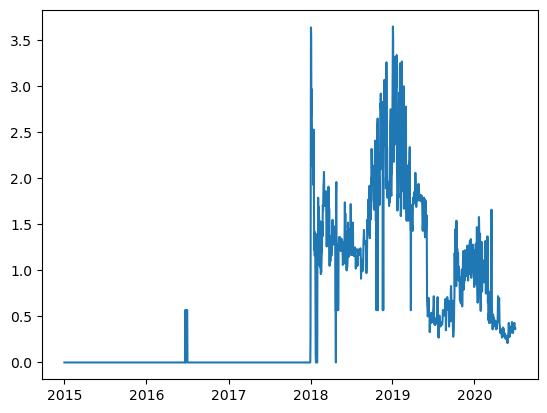

In [127]:
plt.plot(df['Date'][df['City'] == 'Mumbai'], df['CO'][df['City'] == 'Mumbai'])

Even though Mumbai has all the rows it was suppose to has, big part has value equals zero. This may be an error on the data. 

Compare Ahmedabad to Delhi and Patna (NO, CO, Benzene) --- so we can find out why AQI for Ahmedabad is way to large comparing to the top 2 and top 3 in this dataset.

In [128]:
len(df['Date'][df['City'] == 'Ahmedabad'])

2009

In [129]:
len(df['Date'][df['City'] == 'Delhi'])

2009

In [130]:
len(df['Date'][df['City'] == 'Patna'])

1858

They have almost the same range of data, enough to compare themselves.

In [131]:
Ahmedabad_means[Ahmedabad_means > Delhi_means]

NO2         59.025496
CO          22.193407
SO2         55.253733
Benzene      5.413807
Toluene     27.740524
AQI        452.122939
dtype: float64

In [132]:
Delhi_means[Delhi_means > Ahmedabad_means]

PM2.5             117.196153
PM10              232.809229
NO                 38.985595
NOx                58.567023
O3                 51.323610
AQI_Bucket_num      2.000000
dtype: float64

In [133]:
Ahmedabad_means[Ahmedabad_means < Delhi_means]

PM2.5              67.854497
PM10              114.584029
NO                 22.428021
NOx                47.366898
O3                 39.155408
AQI_Bucket_num      1.000000
dtype: float64

In [134]:
Delhi_means[Delhi_means < Ahmedabad_means]

NO2         50.785182
CO           1.976053
SO2         15.901253
Benzene      3.544480
Toluene     17.185042
AQI        259.487744
dtype: float64

The disparity between CO mean from Ahmedabad and Delhi is large, but also is the NO mean. Benzene is almost the same for both, with a smaller mean to Delhi. Is it enough for almost double AQI mean for Ahmedabad? 

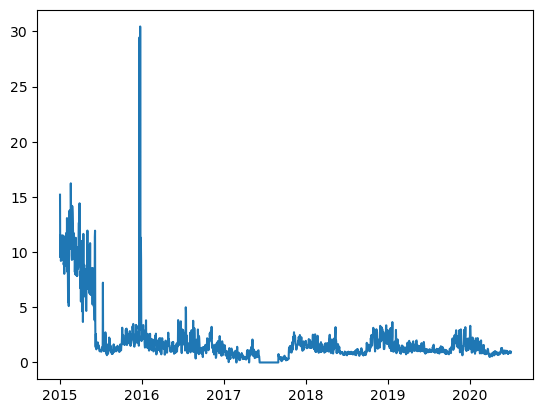

In [135]:
plt.plot(df['Date'][df['City'] == 'Delhi'], df['CO'][df['City'] == 'Delhi'])

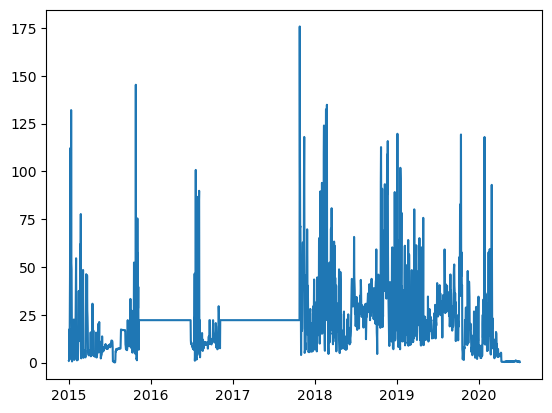

In [136]:
plt.plot(df['Date'][df['City'] == 'Ahmedabad'], df['CO'][df['City'] == 'Ahmedabad'])

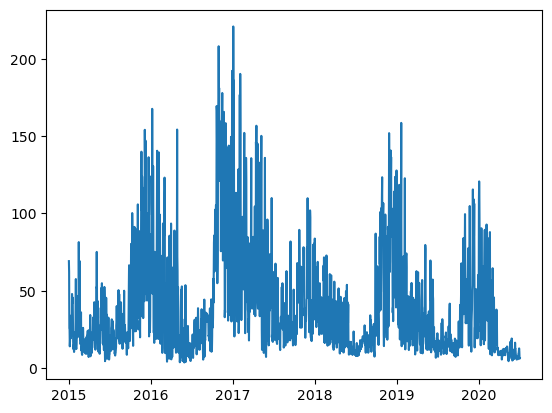

In [137]:
plt.plot(df['Date'][df['City'] == 'Delhi'], df['NO'][df['City'] == 'Delhi'])

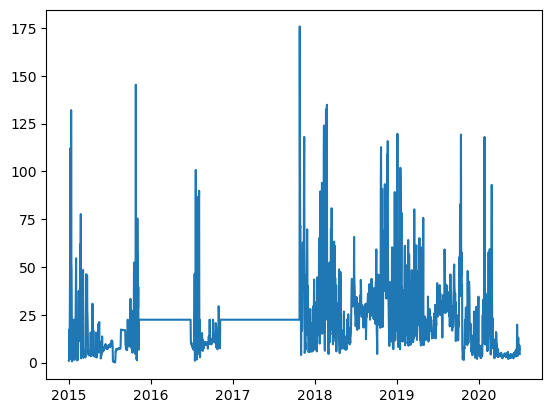

In [138]:
plt.plot(df['Date'][df['City'] == 'Ahmedabad'], df['NO'][df['City'] == 'Ahmedabad'])

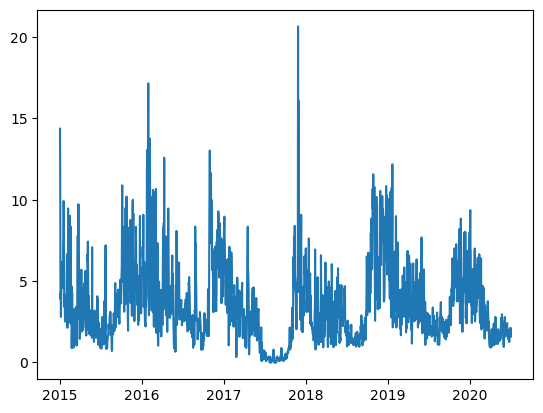

In [139]:
plt.plot(df['Date'][df['City'] == 'Delhi'], df['Benzene'][df['City'] == 'Delhi'])

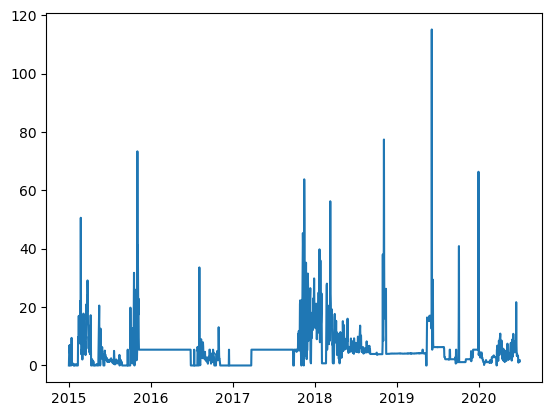

In [140]:
plt.plot(df['Date'][df['City'] == 'Ahmedabad'], df['Benzene'][df['City'] == 'Ahmedabad'])

(array([7.90692362e-02, 5.74970389e-03, 1.25369483e-03, 4.32308563e-04,
        1.29692569e-04, 8.64617126e-05, 8.64617126e-05, 0.00000000e+00,
        0.00000000e+00, 4.32308563e-05]),
 array([  0.   ,  11.514,  23.028,  34.542,  46.056,  57.57 ,  69.084,
         80.598,  92.112, 103.626, 115.14 ]),
 <BarContainer object of 10 artists>)

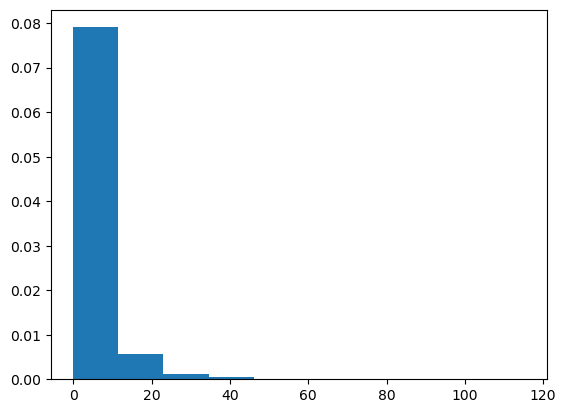

In [141]:
plt.hist( df['Benzene'][df['City'] == 'Ahmedabad'], density = True)

(array([0.14807398, 0.18328375, 0.08537164, 0.04051536, 0.02001651,
        0.00506442, 0.00144698, 0.00024116, 0.00024116, 0.00024116]),
 array([ 0.   ,  2.064,  4.128,  6.192,  8.256, 10.32 , 12.384, 14.448,
        16.512, 18.576, 20.64 ]),
 <BarContainer object of 10 artists>)

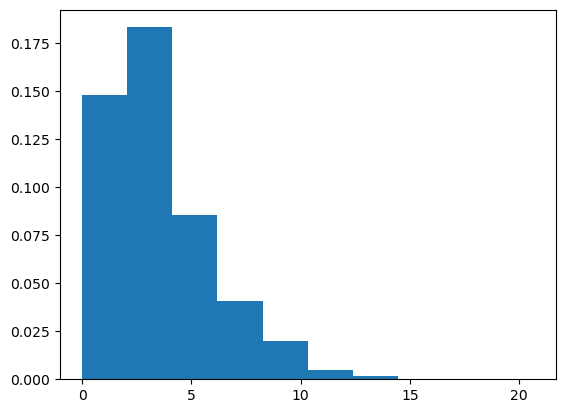

In [142]:
plt.hist( df['Benzene'][df['City'] == 'Delhi'], density = True)

CO and Benzene are playing an important role for changes in AQI

In [143]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'AQI_Bucket_num'],
      dtype='object')

In [144]:
df_long = pd.melt(df, id_vars = ['City', 'Date'], value_vars = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'AQI_Bucket_num'])

In [145]:
df_long

,City,Date,variable,value
0,Ahmedabad,2015-01-01,PM2.5,67.854497
1,Ahmedabad,2015-01-02,PM2.5,67.854497
2,Ahmedabad,2015-01-03,PM2.5,67.854497
3,Ahmedabad,2015-01-04,PM2.5,67.854497
4,Ahmedabad,2015-01-05,PM2.5,67.854497
...,...,...,...,...
413429,Visakhapatnam,2020-06-27,AQI_Bucket_num,4.0
413430,Visakhapatnam,2020-06-28,AQI_Bucket_num,5.0
413431,Visakhapatnam,2020-06-29,AQI_Bucket_num,5.0
413432,Visakhapatnam,2020-06-30,AQI_Bucket_num,5.0


In [146]:
df_pivot = pd.pivot(df_long, index = ['City', 'Date'], columns = 'variable', values = 'value')

In [147]:
df_pivot

variable                         AQI    AQI_Bucket AQI_Bucket_num   Benzene  \
City          Date                                                            
Ahmedabad     2015-01-01  452.122939           NaN            1.0       0.0   
              2015-01-02  452.122939           NaN            1.0      3.68   
              2015-01-03  452.122939           NaN            1.0       6.8   
              2015-01-04  452.122939           NaN            1.0      4.43   
              2015-01-05  452.122939           NaN            1.0      7.01   
...                              ...           ...            ...       ...   
Visakhapatnam 2020-06-27        41.0          Good            4.0      2.24   
              2020-06-28        70.0  Satisfactory            5.0      0.74   
              2020-06-29        68.0  Satisfactory            5.0      0.01   
              2020-06-30        54.0  Satisfactory            5.0       0.0   
              2020-07-01        50.0          Good            4.0  3.891348   

variable                    CO    NH3    NO    NO2    NOx      O3        PM10  \
City          Date                                                              
Ahmedabad     2015-01-01  0.92    NaN  0.92  18.22  17.15  133.36  114.584029   
              2015-01-02  0.97    NaN  0.97  15.69  16.46   34.06  114.584029   
              2015-01-03  17.4    NaN  17.4   19.3   29.7    30.7  114.584029   
              2015-01-04   1.7    NaN   1.7  18.48  17.97   36.08  114.584029   
              2015-01-05  22.1    NaN  22.1  21.42  37.76   39.31  114.584029   
...                        ...    ...   ...    ...    ...     ...         ...   
Visakhapatnam 2020-06-27  0.47  12.47  7.68  25.06  19.54    23.3       50.94   
              2020-06-28  0.52  11.99  3.42  26.06  16.53   30.14       74.09   
              2020-06-29  0.48  10.71  3.45  29.53  18.33   30.96       65.73   
              2020-06-30  0.52  10.03  4.05  29.26   18.8    28.3       49.97   
              2020-07-01  0.59    5.2   0.4  26.85  14.05   17.05        66.0   

variable                      PM2.5    SO2   Toluene  
City          Date                                    
Ahmedabad     2015-01-01  67.854497  27.64      0.02  
              2015-01-02  67.854497  24.55       5.5  
              2015-01-03  67.854497  29.07      16.4  
              2015-01-04  67.854497  18.59     10.14  
              2015-01-05  67.854497  39.33     18.89  
...                             ...    ...       ...  
Visakhapatnam 2020-06-27      15.02   8.55     12.07  
              2020-06-28      24.38  12.72      2.21  
              2020-06-29      22.91   8.42      0.01  
              2020-06-30      16.64   9.84       0.0  
              2020-07-01       15.0    2.1  8.350983  

[29531 rows x 14 columns]

In [148]:
df.to_csv('./air_quality.csv', index = False)

## 3. Ask and Answer Question

1. What are the 3 most poluted cities?
-- Answer: Ahmedabad, Delhi, and Patna

2. What are the 3 least polluted cities?
-- Answer: Aizawl, Shillong, Coimbatore

3. What gases are the most relevant for Air Quality? 
-- Answer: NO, CO, Benzene

4. Why is Ahmedabad AQI so above the other cities?
-- Mostly related to high values of CO and Benzene against only NO

## 4. Conclusion

The gases that are most relevant for AQI are NO, CO, and Benzene. 

Ahmedabad, Delhi, and Patna are the most polluted cities among the 26 presented in this dataset. 

Aizawl, Shillong, and Coimbatore are the least polluted cities among the 26 presented in this dataset.

Insuficient data for more deeper analysis 

Might have some major issues about the data extracted. For example CO in Mumbai. There are almost 3 years of records equals zero. That is unrealistic. 

NO and CO values for Ahmedabad are almost identical throughout the 5 years recording. 

CO has declined in Aizawl in the second quarter.

## Explore in the Future

Search for better datasets with less doubtdful data to have a more accurated analysis. 

Is there a specific period of the year which emissions are higher? If so, make a study about it.

Is CO that relevant? 

what does the other gases role in the AQI?